In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt

import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
from SplineEncodingModel.LinearRegressionSpline import EncodingModel, NBDecodingModel
from SplineEncodingModel import PopDecodingCV as pdcv
import matplotlib.gridspec as gridspec
import pickle

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
# df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [3]:
mouse = '4139265.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1403,4139265.3,10_02_2019,1,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...
1405,4139265.3,10_02_2019,3,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...
1423,4139265.3,11_02_2019,1,TwoTower_foraging,150,0,,2019-02-11,G:\My Drive\VR_Data\TwoTower\4139265.3\11_02_2...,None,None,None
1433,4139265.3,12_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.3\12_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...
1434,4139265.3,12_02_2019,3,TwoTower_foraging,50,0,,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.3\12_02_2...,None,None,None
1441,4139265.3,14_02_2019,1,TwoTower_foraging,175,0,,2019-02-14,G:\My Drive\VR_Data\TwoTower\4139265.3\14_02_2...,None,None,None
1455,4139265.3,15_02_2019,4,TwoTower_foraging,72,1,CA1,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.3\15_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...
1456,4139265.3,15_02_2019,5,TwoTower_foraging,39,0,,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.3\15_02_2...,None,None,None
1468,4139265.3,16_02_2019,2,TwoTower_foraging,175,0,,2019-02-16,G:\My Drive\VR_Data\TwoTower\4139265.3\16_02_2...,None,None,None
1475,4139265.3,17_02_2019,2,TwoTower_foraging,81,1,CA1,2019-02-17,G:\My Drive\VR_Data\TwoTower\4139265.3\17_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...


In [4]:
sess = df_mouse.iloc[-1]

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:316: RuntimeWarning: invalid value encountered in greater
  rzone_poss = sub_frame['pos']._values[np.ediff1d(sub_frame['rzone']._values,to_end=0)>0]


(120, 45) (120,)


C:\Users\mplitt\MightyMorphingPhotonRangers\behavior.py:109: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to s

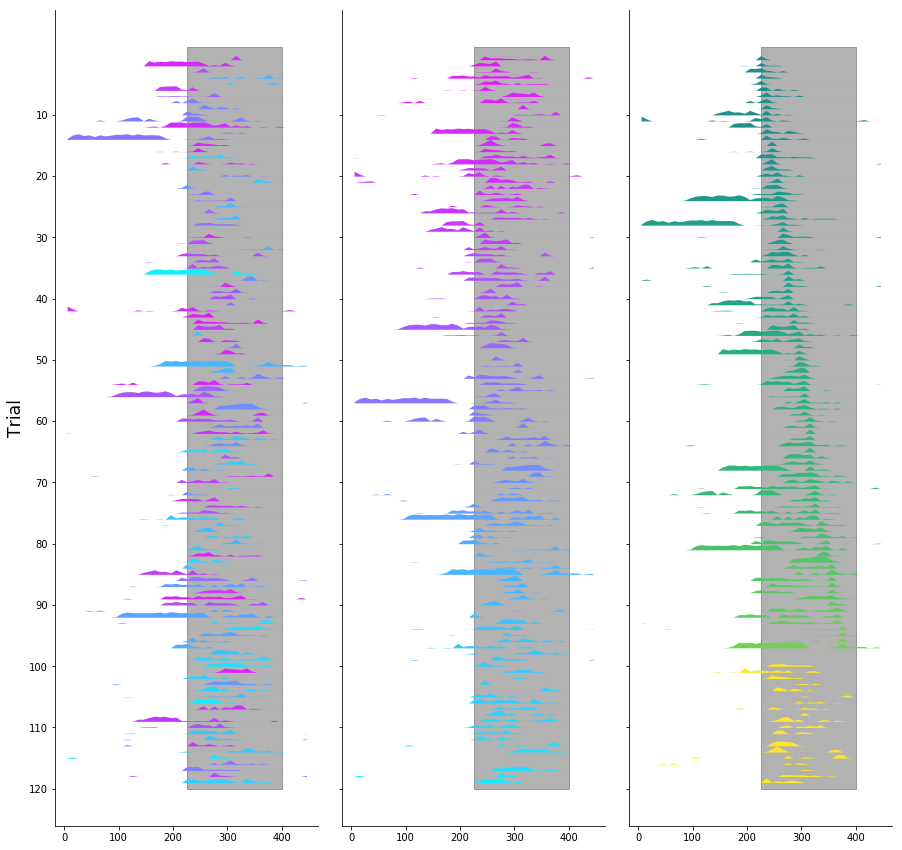

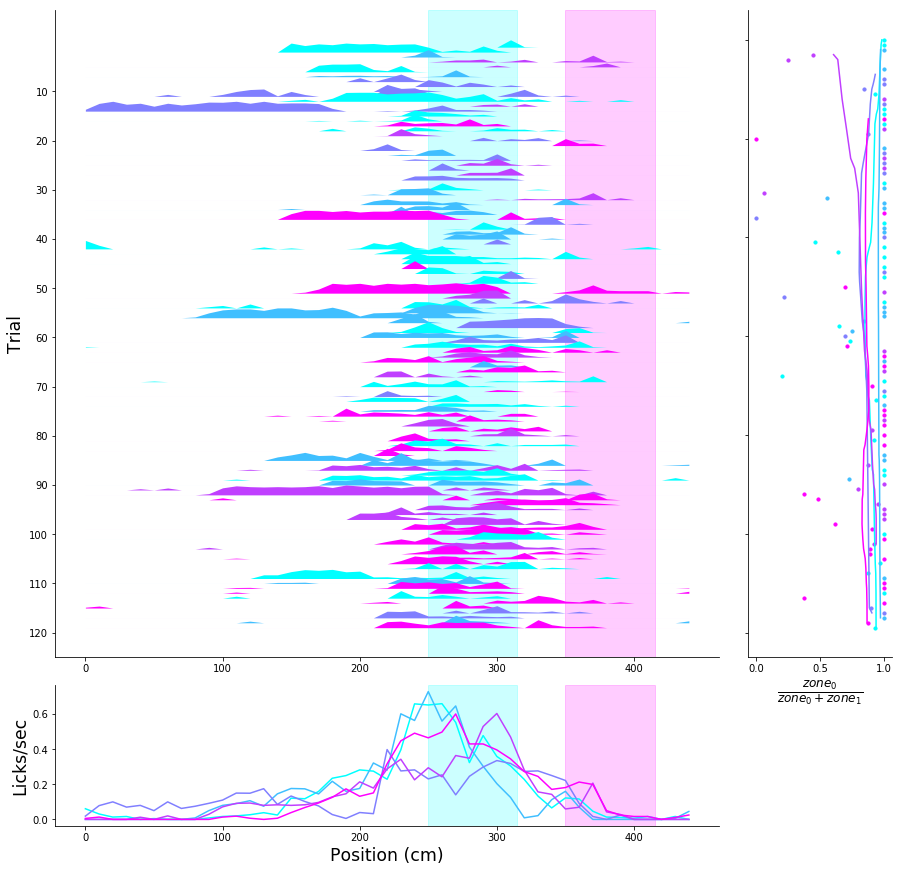

In [5]:
VRDat = pp.behavior_dataframe(sess['data file'])
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
lick_trial_mat,occ,edges,centers= u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                                            VRDat['pos']._values,
                                                            VRDat['tstart']._values,
                                                            VRDat['teleport']._values,
                                                            bin_size=10)
lick_trial_mat = lick_trial_mat[:150,:]
print(lick_trial_mat.shape,trial_info['morphs'].shape)
lick_morph_dict = u.trial_type_dict(lick_trial_mat,trial_info['morphs'][:150])
speed_trial_mat = u.make_pos_bin_trial_matrices(VRDat['speed']._values,
                                                        VRDat['pos']._values,
                                                        VRDat['tstart']._values,
                                                        VRDat['teleport']._values,
                                                        mat_only=True,bin_size=10)

effMorph = (trial_info['morphs']+trial_info['wallJitter']+trial_info['bckgndJitter']+.25)/1.5
reward_pos = trial_info['reward_pos']
reward_pos[np.isnan(reward_pos)]= 480.
f_lick, axarr_lick = b.behavior_raster_foraging(lick_trial_mat/np.nanmax(lick_trial_mat.ravel()),
                                                centers,effMorph[:150],reward_pos[:150]/480.,smooth=False)


f_lick, (ax_lick, meanlr_ax, lickrat_ax) = b.lick_plot_task(lick_morph_dict,edges,smooth=False)